In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import stdev
import os
import lvm_read
from datetime import datetime


In [19]:

Day = "25"
Month_year = "July23"

# Folder path
folder_path = r"G:\Shared drives\EGR-MNE-FAST Research Group-ExperimentalData\Projects\additive_manufacturing\projects\thermal_conductivity\Data\Ethans Data\25July2023_ThermalConductivity_StainlessSteel_NonChanneled"

# List xlsx files in the folder
xlsx_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(".xlsx")]
xlsx_files.sort()
# Lists to store averages
TC_Group_1_AVG = []
TC_Group_2_AVG = []
TC_Group_3_AVG = []
Time_Group = []

for file_path in xlsx_files:
    try:
        xlsx_data = pd.read_excel(file_path)
        df = pd.DataFrame(xlsx_data)

        # TC1-4
        TC_1_4 = ["TC1", "TC2", "TC3", "TC4"]
        TC_1_4_AVG = df[TC_1_4].mean().mean().round(3)
        TC_Group_1_AVG.append(TC_1_4_AVG)

        # TC5-8
        TC_5_8 = ["TC5", "TC6", "TC7", "TC8"]
        TC_5_8_AVG = df[TC_5_8].mean().mean().round(3)
        TC_Group_2_AVG.append(TC_5_8_AVG)

        # TC10-13
        TC_10_13 = ["TC10", "TC11", "TC12", "TC13"]
        TC_10_13_AVG = df[TC_10_13].mean().mean().round(3)
        TC_Group_3_AVG.append(TC_10_13_AVG)

        # Time
        time_str = df['Time'].iloc[0].strftime('%H:%M:%S.%f')[:-3]
        dummy_date_str = '1970-01-01'
        time_obj = datetime.strptime(time_str, '%H:%M:%S.%f')
        total_seconds = (time_obj.hour * 3600) + (time_obj.minute * 60) + time_obj.second + (time_obj.microsecond / 1000000)
        total_hours = total_seconds/3600



        Time_Group.append(total_hours)

    except Exception as e:
        print(f"Error processing file: {file_path}, Error: {e}")
#adjusting time scale
First = Time_Group[0]
Time_From_0 = [round(x - First, 2) for x in Time_Group]

# Create DataFrame
data = {
    "Time": Time_From_0,
    "G1TAverage": TC_Group_1_AVG,
    "G2TAverage": TC_Group_2_AVG,
    "G3TAverage": TC_Group_3_AVG
}
T_avg_chart = pd.DataFrame(data)
T_avg_chart


,Time,G1TAverage,G2TAverage,G3TAverage
0,0.00,20.605,19.393,9.488
1,0.34,57.385,33.552,11.605
2,0.89,79.319,59.729,23.009
3,1.22,83.904,67.495,24.371
4,1.35,85.168,69.563,25.946
5,1.56,86.649,72.131,26.978
6,1.91,87.995,73.803,24.027
7,2.09,88.363,74.340,24.189
8,2.42,88.785,75.054,24.338
9,2.77,88.935,75.391,22.134


In [20]:
TC_1_AVG = []
TC_2_AVG = []
TC_3_AVG = []
TC_4_AVG = []
for file_path in xlsx_files:
    for i in range(1,5,1):
        xlsx_data = pd.read_excel(file_path)
        df = pd.DataFrame(xlsx_data)
        moobis = df[f'TC{i}'].mean()
        if i == 1:
            TC_1_AVG.append(moobis)
        elif i == 2:
            TC_2_AVG.append(moobis)
        elif i == 3:
            TC_3_AVG.append(moobis)
        elif i == 4:
            TC_4_AVG.append(moobis)


data_2 = {
    "Time": Time_From_0,
    "TC_1": TC_1_AVG,
    "TC_2": TC_2_AVG,
    "TC_3": TC_3_AVG,
    "TC_4": TC_4_AVG
}
Radial_chart = pd.DataFrame(data_2)
Steady_state = Radial_chart.iloc[8:14]
Steady_time = Time_From_0[8:14]
Radial_chart

,Time,TC_1,TC_2,TC_3,TC_4
0,0.00,20.717782,20.616375,20.694448,20.390614
1,0.34,60.855686,58.860488,57.207252,52.616537
2,0.89,79.819181,78.637756,81.342627,77.474468
3,1.22,84.349066,83.248908,85.422261,82.596237
4,1.35,85.620285,84.549977,86.576216,83.926404
5,1.56,87.118113,86.094534,87.919685,85.464339
6,1.91,88.512141,87.485897,89.060521,86.920297
7,2.09,88.878676,87.860796,89.388129,87.325790
8,2.42,89.303968,88.297637,89.757857,87.780719
9,2.77,89.551447,88.544498,89.811680,87.831566


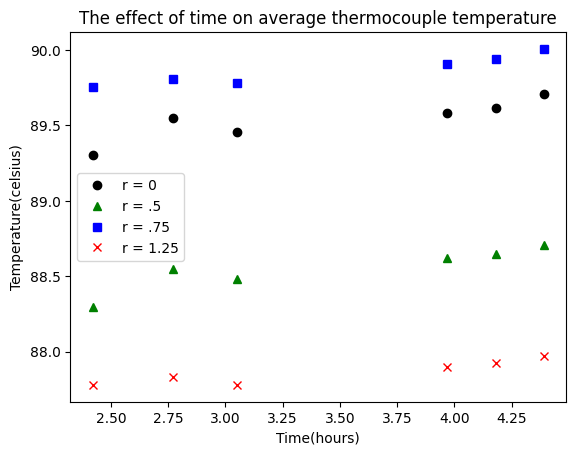

In [21]:
y1 = Steady_state['TC_1']
y2 = Steady_state['TC_2']
y3 = Steady_state['TC_3']
y4 = Steady_state['TC_4']
plt.plot(Steady_time,y1,'o',label="r = 0", color=("black"))
plt.plot(Steady_time,y2,'^',label="r = .5",color=("green"))
plt.plot(Steady_time,y3,'s',label="r = .75",color=("blue"))
plt.plot(Steady_time,y4,'x',label="r = 1.25",color=("red"))
plt.xlabel('Time(hours)')
plt.ylabel("Temperature(celsius)")
plt.title("The effect of time on average thermocouple temperature")
plt.legend()

In [22]:
TC_5_AVG = []
TC_6_AVG = []
TC_7_AVG = []
TC_8_AVG = []
for file_path in xlsx_files:
    for i in range(5,9,1):
        xlsx_data = pd.read_excel(file_path)
        df = pd.DataFrame(xlsx_data)
        moobis = df[f'TC{i}'].mean()
        if i == 5:
            TC_5_AVG.append(moobis)
        elif i == 6:
            TC_6_AVG.append(moobis)
        elif i == 7:
            TC_7_AVG.append(moobis)
        elif i == 8:
            TC_8_AVG.append(moobis)


data_3 = {
    "Time": Time_From_0,
    "TC_5": TC_5_AVG,
    "TC_6": TC_6_AVG,
    "TC_7": TC_7_AVG,
    "TC_8": TC_8_AVG
}
Radial_chart = pd.DataFrame(data_3)
Steady_state = Radial_chart.iloc[8:14]
Steady_time = Time_From_0[8:14]
Radial_chart

,Time,TC_5,TC_6,TC_7,TC_8
0,0.00,19.327145,19.420829,19.953214,18.869900
1,0.34,32.906439,34.019066,34.258144,33.022377
2,0.89,60.217483,58.822043,60.661929,59.213004
3,1.22,68.500681,67.489154,67.449957,66.540773
4,1.35,70.503572,69.863003,69.459329,68.426958
5,1.56,72.927389,72.814117,71.974553,70.806803
6,1.91,74.759439,75.489763,72.889236,72.072567
7,2.09,75.347526,76.082165,73.356789,72.574640
8,2.42,76.096165,76.790196,74.063009,73.267122
9,2.77,76.454354,77.150634,74.359434,73.598008


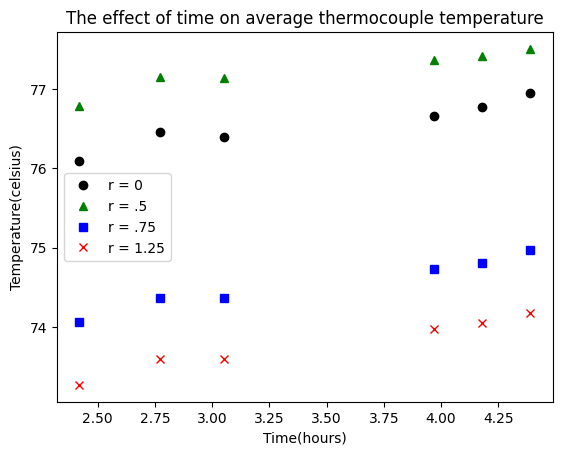

In [23]:
y1 = Steady_state['TC_5']
y2 = Steady_state['TC_6']
y3 = Steady_state['TC_7']
y4 = Steady_state['TC_8']
plt.plot(Steady_time,y1,'o',label="r = 0", color=("black"))
plt.plot(Steady_time,y2,'^',label="r = .5",color=("green"))
plt.plot(Steady_time,y3,'s',label="r = .75",color=("blue"))
plt.plot(Steady_time,y4,'x',label="r = 1.25",color=("red"))
plt.xlabel('Time(hours)')
plt.ylabel("Temperature(celsius)")
plt.title("The effect of time on average thermocouple temperature")
plt.legend()

In [24]:
TC_10_AVG = []
TC_11_AVG = []
TC_12_AVG = []
TC_13_AVG = []
for file_path in xlsx_files:
    for i in range(10,14,1):
        xlsx_data = pd.read_excel(file_path)
        df = pd.DataFrame(xlsx_data)
        moobis = df[f'TC{i}'].mean()
        if i == 10:
            TC_10_AVG.append(moobis)
        elif i == 11:
            TC_11_AVG.append(moobis)
        elif i == 12:
            TC_12_AVG.append(moobis)
        elif i == 13:
            TC_13_AVG.append(moobis)


data_4 = {
    "Time": Time_From_0,
    "TC_10": TC_10_AVG,
    "TC_11": TC_11_AVG,
    "TC_12": TC_12_AVG,
    "TC_13": TC_13_AVG
}
Radial_chart = pd.DataFrame(data_4)
Steady_state = Radial_chart.iloc[8:14]
Steady_time = Time_From_0[8:14]
Radial_chart

,Time,TC_10,TC_11,TC_12,TC_13
0,0.00,9.571083,9.912042,10.022119,8.445387
1,0.34,11.912012,12.038799,12.104246,10.363372
2,0.89,23.870417,24.410822,24.383455,19.372755
3,1.22,25.400052,26.455876,26.421292,19.207083
4,1.35,27.085559,28.135867,27.779615,20.783103
5,1.56,28.027191,29.207117,28.901345,21.775624
6,1.91,26.044633,27.064887,24.410461,18.589745
7,2.09,26.493910,27.376378,23.923925,18.962116
8,2.42,26.822390,27.578679,24.157485,18.792725
9,2.77,24.910914,25.341132,22.320468,15.964086


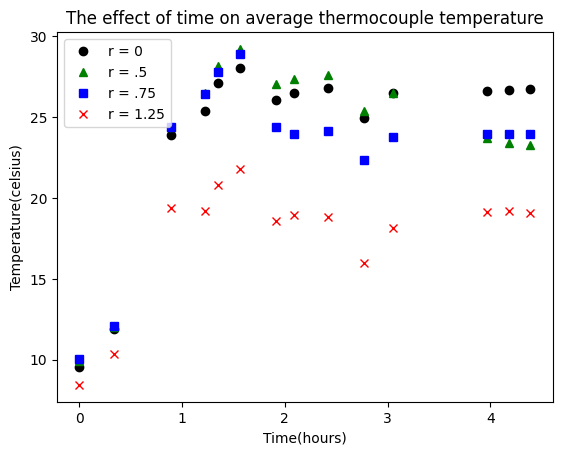

In [26]:
y1 = Radial_chart['TC_10']
y2 = Radial_chart['TC_11']
y3 = Radial_chart['TC_12']
y4 = Radial_chart['TC_13']
plt.plot(Time_From_0,y1,'o',label="r = 0", color=("black"))
plt.plot(Time_From_0,y2,'^',label="r = .5",color=("green"))
plt.plot(Time_From_0,y3,'s',label="r = .75",color=("blue"))
plt.plot(Time_From_0,y4,'x',label="r = 1.25",color=("red"))
plt.xlabel('Time(hours)')
plt.ylabel("Temperature(celsius)")
plt.title("The effect of time on average thermocouple temperature")
plt.legend()